In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, Flatten, Dense
from keras.models import Model
import tensorflow as tf
# Load MNIST dataset


In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Modify labels: 8s are labeled as 1, non-8s are labeled as 0
y_train_binary = np.where(y_train == 8, 1, 0)
y_test_binary = np.where(y_test == 8, 1, 0)

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Split the dataset into training and validation sets
X_train, X_val, y_train_binary, y_val_binary = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

input_layer = Input(shape=(28, 28, 1))

# Same convolution with 2 channels and paddings
conv1 = Conv2D(2, (3, 3), padding='same', activation='relu')(input_layer)

# Another convolution into a 1x1x50 volume
conv2 = Conv2D(50, (1, 1), activation='relu')(conv1)

conv3 = Conv2D(50, (28, 28), activation='relu')(conv2)

# Flatten the output for the fully connected layer
flatten = Flatten()(conv3)

# Fully connected layer with 50 units
#fc = Dense(50, activation='relu')(flatten)

# Output layer
output_layer = Dense(1, activation='sigmoid')(flatten)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()

# Retrieve layer outputs and weights
layer_outputs = [layer.output for layer in model.layers]
layer_inputs = [layer.input for layer in model.layers]
layer_weights = [layer.get_weights() for layer in model.layers]

# Display layer names and their corresponding output shape

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the model if it has been trained before
try:
  model = tf.keras.models.load_model('model/xcnn.h5')
except:
    history = model.fit(X_train, y_train_binary, epochs=5, batch_size=64, validation_data=(X_val, y_val_binary))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test_binary)
    print(f'Test accuracy: {test_acc}')

    model.save('model/xcnn.h5')

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 2)         20        
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 50)        150       
                                                                 
 conv2d_33 (Conv2D)          (None, 1, 1, 50)          1960050   
                                                                 
 flatten_13 (Flatten)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1960271 (7.48 MB)
Trainable params: 1960271 

In [39]:
last_layer = model.layers[-1]

# Get the weights of the last layer
weights = last_layer.get_weights()

weights = weights[0]

print("max of the the last layer", min(weights))
# Print the weights
print("Weights of the last layer:")
print(weights)

max of the the last layer [-0.61585265]
Weights of the last layer:
[[ 0.25903034]
 [ 0.2646674 ]
 [ 0.0012759 ]
 [-0.61585265]
 [-0.2834767 ]
 [-0.3125581 ]
 [ 0.07855492]
 [-0.45450023]
 [ 0.20681988]
 [ 0.17385013]
 [ 0.0801001 ]
 [-0.34099704]
 [-0.3754249 ]
 [ 0.27965194]
 [ 0.06289399]
 [-0.38236722]
 [-0.32808605]
 [-0.37428644]
 [ 0.0726971 ]
 [-0.4121389 ]
 [-0.28361636]
 [-0.2878095 ]
 [ 0.11526138]
 [-0.40347627]
 [ 0.13054508]
 [-0.49116027]
 [ 0.03561959]
 [ 0.19330803]
 [ 0.04483709]
 [-0.51624715]
 [ 0.01154273]
 [ 0.18281421]
 [ 0.30240762]
 [-0.50031036]
 [-0.37430197]
 [-0.38936982]
 [-0.3951593 ]
 [ 0.20873784]
 [-0.36994138]
 [ 0.02561937]
 [ 0.0629684 ]
 [ 0.04273852]
 [-0.4101852 ]
 [ 0.15069988]
 [ 0.11359768]
 [ 0.10039623]
 [-0.33072585]
 [ 0.18018767]
 [ 0.1682389 ]
 [ 0.09705088]]


1/1 [==============================] - 0s 52ms/step
[[0.02653988]]


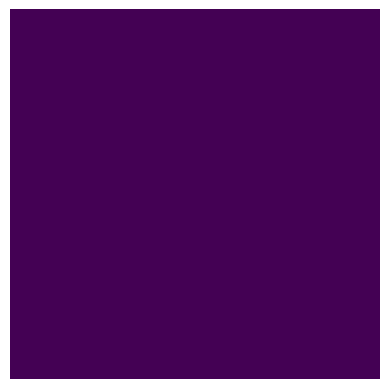

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sample_img = X_train[0].reshape(1, 28, 28, 1)
activations = model.predict(sample_img)
print(activations)
num_filters = activations.shape[-1]

plt.imshow(activations, cmap='viridis')
plt.axis('off')
#plt.imshow(sample_img[0, :, :, 0], cmap='gray')

plt.show()

In [40]:
print(activations)

[array([[[[0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         ...,
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848]],

        [[0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         ...,
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848]],

        [[0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         ...,
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848]],

        ...,

        [[0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         ...,
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0.03910938, 0.08141848]],

        [[0.03910938, 0.08141848],
         [0.03910938, 0.08141848],
         [0

In [41]:
# Display layer names and their corresponding output shape
for layer, output, weights in zip(model.layers, layer_outputs, layer_weights):
    print(f"Layer Name: {layer.name}, Output Shape: {output.shape}, ")



Layer Name: input_13, Output Shape: (None, 28, 28, 1), 
Layer Name: conv2d_28, Output Shape: (None, 28, 28, 2), 
Layer Name: conv2d_29, Output Shape: (None, 28, 28, 50), 
Layer Name: conv2d_30, Output Shape: (None, 1, 1, 50), 
Layer Name: flatten_12, Output Shape: (None, 50), 
Layer Name: dense_13, Output Shape: (None, 1), 


In [42]:
for layer, input, weights in zip(model.layers, layer_inputs, layer_weights):
    print(f"Layer Name: {layer.name}, Output Shape: {input} ")

Layer Name: input_13, Output Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_14'), name='input_14', description="created by layer 'input_14'") 
Layer Name: conv2d_28, Output Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_14'), name='input_14', description="created by layer 'input_14'") 
Layer Name: conv2d_29, Output Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 2), dtype=tf.float32, name=None), name='conv2d_31/Relu:0', description="created by layer 'conv2d_31'") 
Layer Name: conv2d_30, Output Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 50), dtype=tf.float32, name=None), name='conv2d_32/Relu:0', description="created by layer 'conv2d_32'") 
Layer Name: flatten_12, Output Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 50), dtype=tf.float32, name=None), name='conv2d_33/Relu:0', description="created by layer 'conv2d_33'") 
Layer Name: dense_13, Output Sh

1/1 [==============================] - 0s 8ms/step
0	

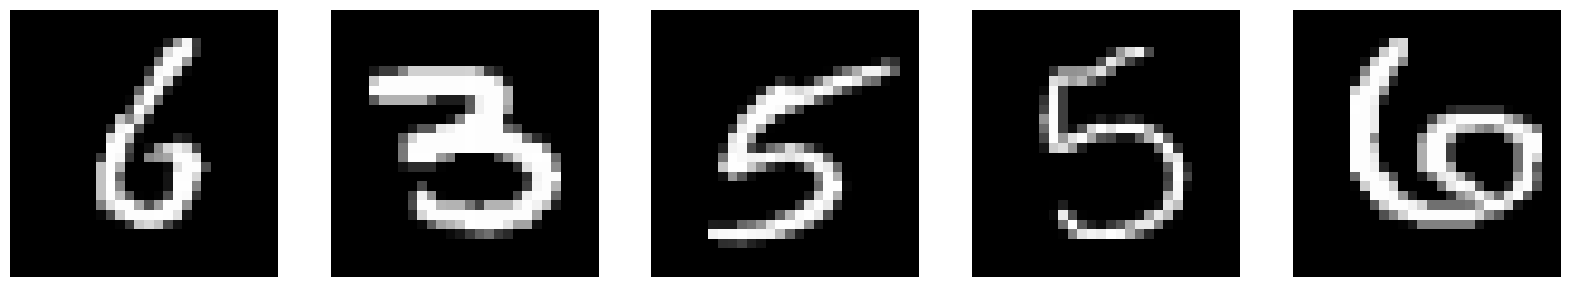

In [43]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+50,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

In [10]:
layer_outputs = [layer.output for layer in model.layers[1:3]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

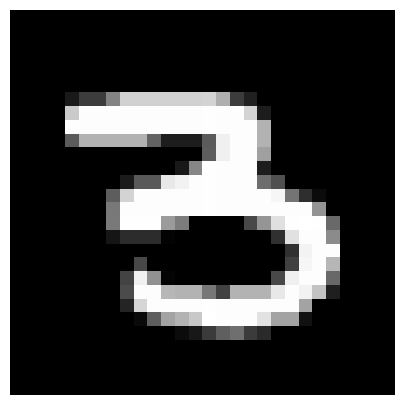

In [11]:
img = X_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [12]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 23ms/step


In [13]:
print(model.layers)

[<keras.src.engine.input_layer.InputLayer object at 0x2907edd30>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x294519ac0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x294580ca0>, <keras.src.layers.reshaping.flatten.Flatten object at 0x2cf8d14f0>, <keras.src.layers.core.dense.Dense object at 0x2900a4a30>]


In [14]:
layer_names = []
for layer in model.layers[1:3]:
    layer_names.append(layer.name)
    
act = []
for layer in activations:
    act.append(layer)

In [15]:
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = (n_features + images_per_row - 1) // images_per_row
    print(f"No of Features : {n_features} \n Size: {size} \n No. of COlumns : {n_cols}")

    mat = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            if col * images_per_row + row < n_features:
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                print(f"Channel_Image Shape : {channel_image.shape} \n Channel Image {channel_image[:5]}")


NameError: name 'images_per_row' is not defined

No of Features : 2 
 Size: 28 
 No. of COlumns : 1
No of Features : 50 
 Size: 28 
 No. of COlumns : 5


<ipython-input-110-a9ab8933a0bc>:17: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


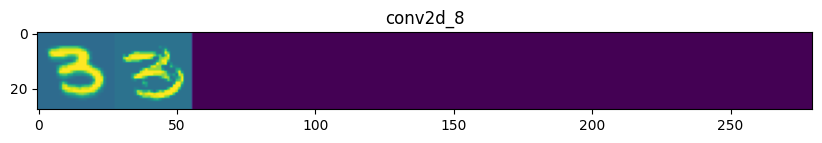

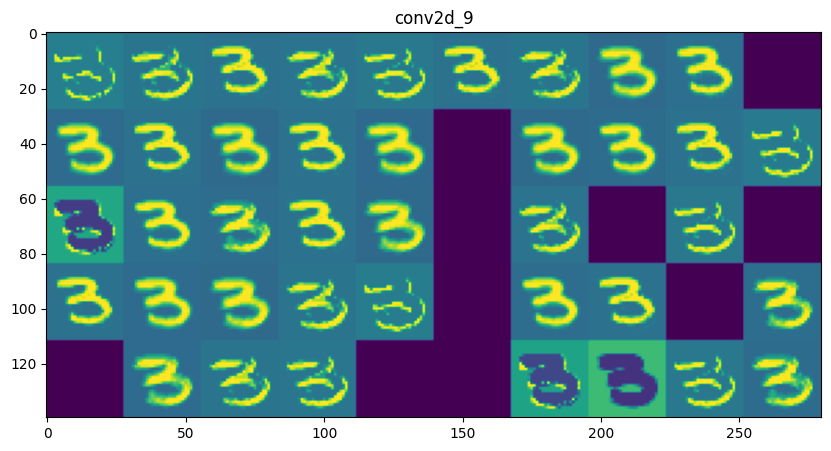

In [ ]:
images_per_row = 10

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = (n_features + images_per_row - 1) // images_per_row
    print(f"No of Features : {n_features} \n Size: {size} \n No. of COlumns : {n_cols}")

    mat = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            if col * images_per_row + row < n_features:
                channel_image = layer_activation[0, :, :, col * images_per_row + row]

                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                mat[col * size: (col + 1) * size, row * size: (row + 1) * size] = channel_image


    scale = 1. / size
    plt.figure(figsize=(scale * mat.shape[1], scale * mat.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(mat, aspect='auto', cmap='viridis')


plt.show()

No of Features : 2 
 Size: 28 
 No. of COlumns : 1
No of Features : 50 
 Size: 28 
 No. of COlumns : 5


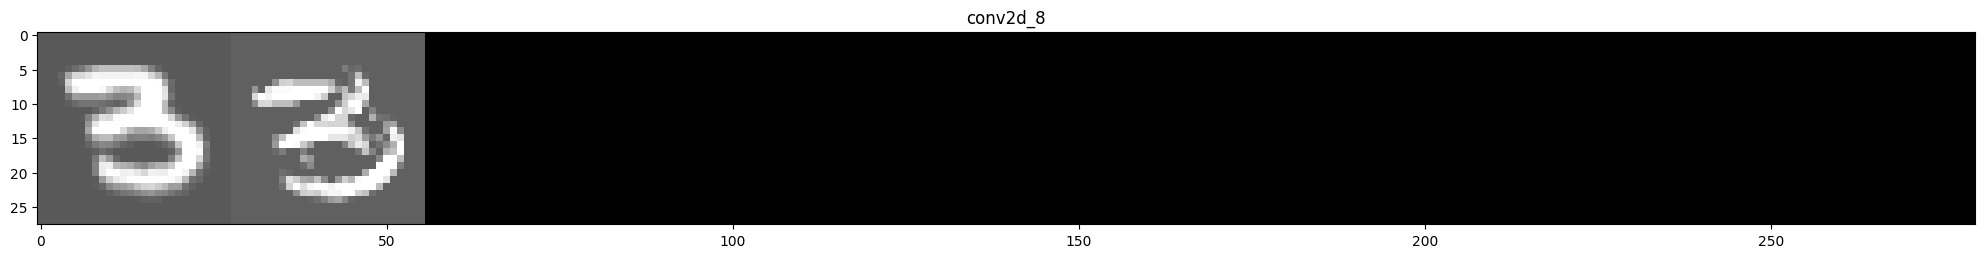

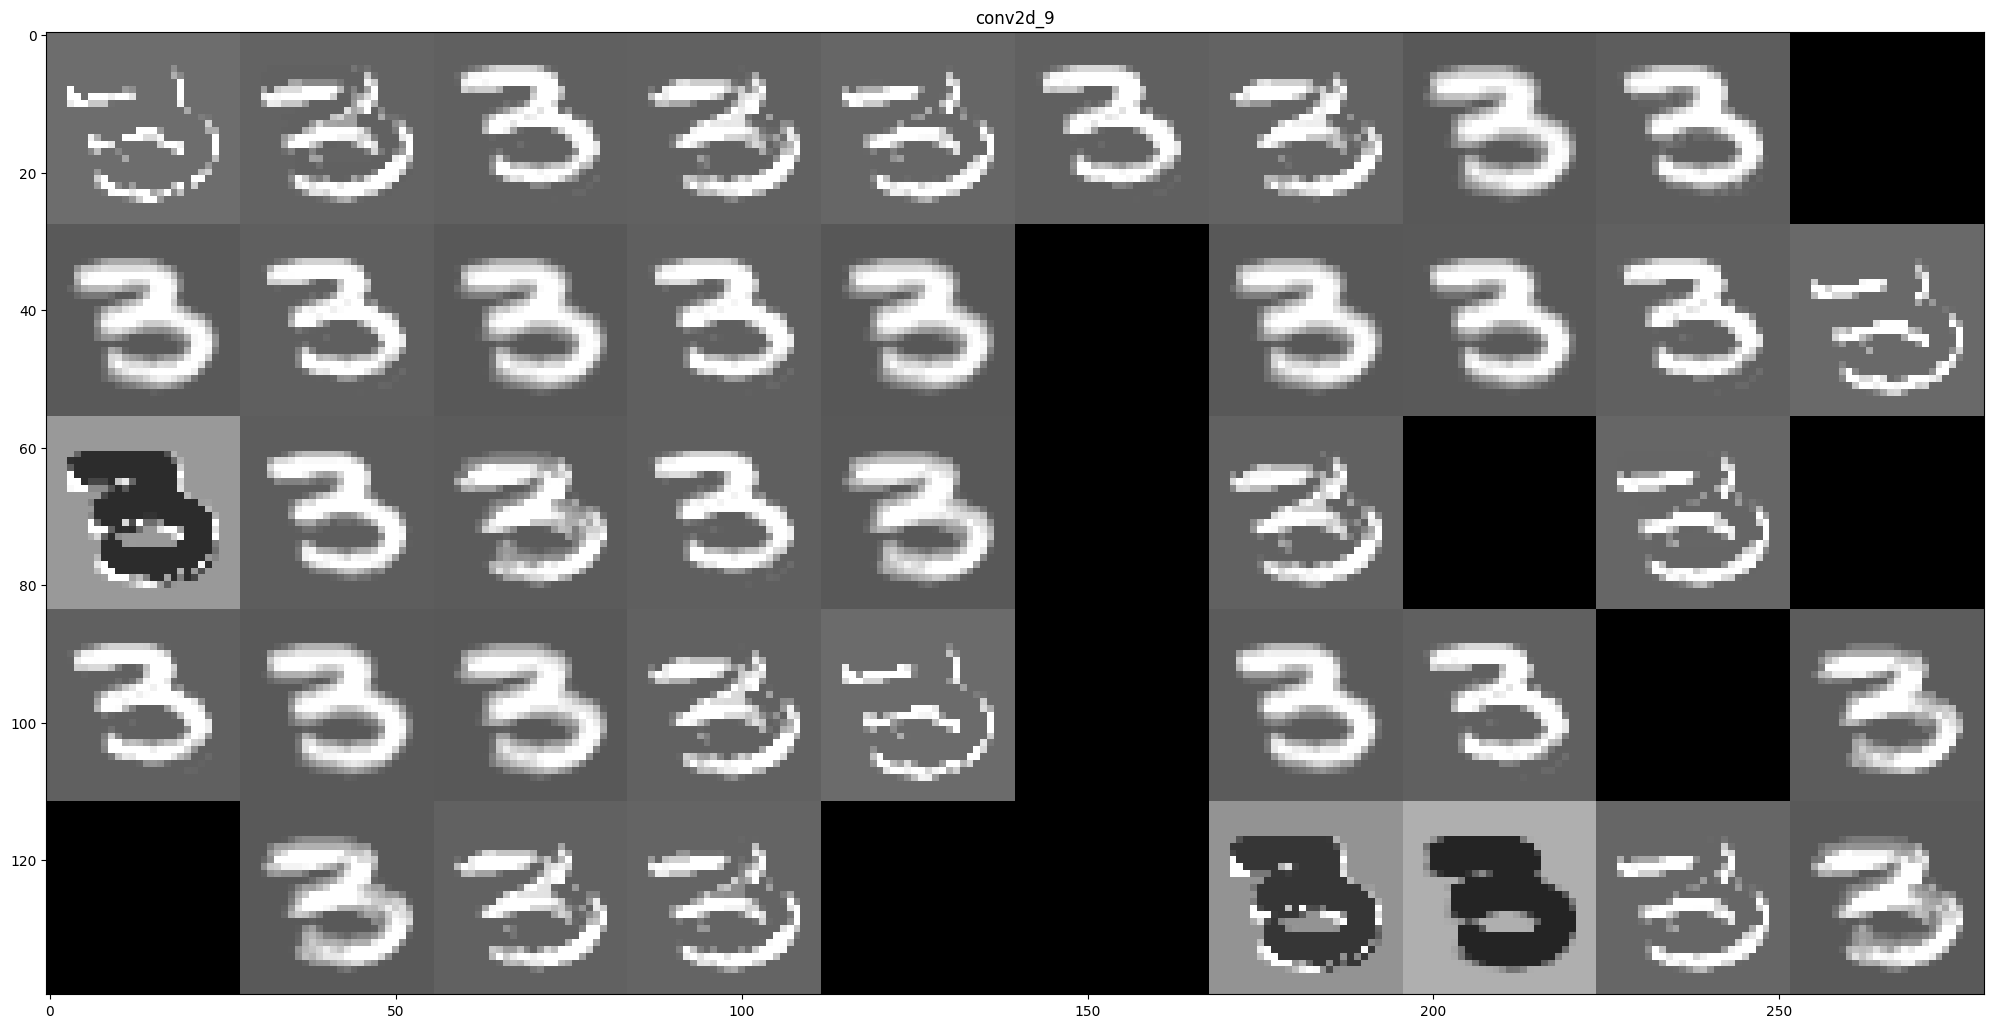

In [ ]:
images_per_row = 10

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = (n_features + images_per_row - 1) // images_per_row
    print(f"No of Features : {n_features} \n Size: {size} \n No. of COlumns : {n_cols}")

    mat = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            if col * images_per_row + row < n_features:
                channel_image = layer_activation[0, :, :, col * images_per_row + row]

                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                mat[col * size: (col + 1) * size, row * size: (row + 1) * size] = channel_image


    scale = 2.5 / size
    plt.figure(figsize=(scale * mat.shape[1], scale * mat.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(mat, aspect='auto', cmap='gray')


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf


layer_name = 'input_5'
neuron_index = 0
img = X_test[0].reshape(1, 28, 28, 1).astype('float32')

def guided_backpropagation(model, layer_name, neuron_index, input_image):
    input_layer = model.layers[0].input
    layer_output = model.get_layer(layer_name).output

    #
    with tf.GradientTape() as tape:
        tape.watch(input_layer)
        layer_output = model.get_layer(layer_name).output
        loss = K.mean(layer_output[:, :, :, neuron_index])


    grads = tape.gradient(loss, input_layer)

    # Convert to numpy array
    g_grads = grads.numpy()

    return g_grads


guided_grads = guided_backpropagation(model, layer_name, neuron_index, img)

# Visualize the gradients
plt.imshow(guided_grads[0, :, :, 0], cmap='viridis')
plt.title(f'Receptive Field  {neuron_index}')
plt.show()

ValueError: ignored

1/1 [==============================] - 0s 61ms/step


TypeError: ignored

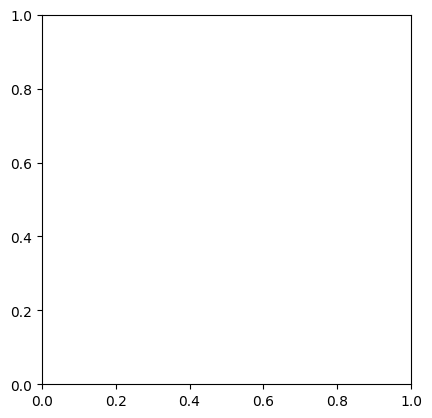

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

layer_name = 'conv2d_4'
neuron_index = 0
model = load_model('/content/sample_data/xcnn.hd5')
img = X_test[0].reshape(1, 28, 28, 1).astype('float32')

# Function to visualize neuron inputs for a given layer and neuron index
def visualize_neuron_input(layer_name, neuron_index):
    layer_output = model.get_layer(layer_name).output
    intermediate_model = tf.keras.Model(inputs=model.input, outputs=layer_output)
    features = intermediate_model.predict(np.expand_dims(image, axis=0))

    # Calculate receptive field size based on layer architecture
    receptive_field_size = 3

    # Map the receptive field back to the original image
    receptive_field_start = neuron_index * receptive_field_size
    receptive_field_end = receptive_field_start + receptive_field_size

    # Plot original image with highlighted receptive field
    plt.imshow(img)
    plt.plot((receptive_field_start, receptive_field_end), (0, 0), color='red')
    plt.plot((0, 0), (receptive_field_start, receptive_field_end), color='red')
    plt.title('Original Image with Receptive Field')

    # Plot corresponding activated features
    plt.figure()
    plt.imshow(features[0, :, :, neuron_index])  # Assuming 1 channel in features
    plt.title('Activated Features for Neuron')
    plt.show()

# Example usage: Visualize the input for a neuron in the 'conv2d_1' layer
visualize_neuron_input(layer_name, 0)  # Replace with desired layer and neuron index
